# $$i\frac{\partial\Psi(x,y,t)}{\partial t} = -\frac{1}{2}\nabla^2 \Psi (x,y,t)+\tilde{v}_{2D}\Psi(x,y,t)+ g_{2D}|\Psi(x,y,t)|^2\Psi(x,y,t)$$

$$\iint dxdy |\Psi|^2 = 1$$

> In terms of propagate the dynamical equation, given a initial condition $\Psi_0$, the numerical method to be used must be as accurate as possible in space and time(with some priority); Spectral(FFT)-Space + RK4 (RK45,RK6), Finite differences-Space + RK4 (RK45,RK6), a high order Split step in time and a SPectral in space ...

> Given the parallel nature of CUDA lenguage, implicit methods like Crak-Nicholson that derive in stron no parallel algorithms, ie solve tridiagonal systems give us no the best algorithms to CUDA (see [ref0](http://www.springer.com/cda/content/document/cda_downloaddocument/9783319065472-c1.pdf?SGWID=0-0-45-1469316-p176715543))

> In resume we have to find the balance between a explicit numerical (with strong parallel structure) scheme and a high oder integrator in time.

A good article of why a RK method is a good method for GPE real time propagation, can be found here [ref1](http://dx.doi.org/10.1016/j.apnum.2013.04.002)

# TIME = Runge-Kutta [Link](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Adaptive_Runge.E2.80.93Kutta_methods)
-----------------------------------

### Runge-Kutta 4th Methods

>$$ \dot{y}(t)  =   f(t,y(t))$$

>Recurrencia: $$y_{i+1} = y_i + \frac{1}{6}\delta t(k_1+2k_2+2k_3+k_4) \\$$
$$k_1 = f(t_i,y_i) \\
  k_2 = f(t_i+\frac{1}{2}\delta t, y_i+\frac{1}{2} k_1 \delta t) \\
  k_3 = f(t_i+\frac{1}{2}\delta t, y_i+\frac{1}{2} k_2 \delta t)\\
  k_4 = f(t_i+\delta t, y_i + k_3 \delta t)$$

**Hint:** The algoritmh is a chain but is optimal in memory because we need only 2 array to compute the next $k_i$ term and an extra array to store the new state

 ### Runge-Kutta-Fehlberg Method (RKF45)
 
 >$$ \dot{y}(t)  =   f(t,y(t))$$

>Recurrencia 4th Orden: $$y_{i+1} = y_i + \delta t(\frac{25}{216}k_1+\frac{1408}{2565}k_3+\frac{2197}{4101}k_4-\frac{1}{5}k_5) \\$$

>Recurrencia 5th Orden: $$z_{i+1} = y_i + \delta t(\frac{16}{135}k_1+\frac{6656}{12825}k_3+\frac{28561}{56430}k_4-\frac{9}{50}k_5+\frac{2}{55}k_6) \\$$
$$k_1 = f(t_i,y_i) \\
  k_2 = f(t_i+\frac{1}{4}\delta t, y_i+\frac{1}{4} k_1\delta t ) \\
  k_3 = f(t_i+\frac{3}{8}\delta t, y_i+\frac{3}{32} k_1\delta t + \frac{9}{32}k_2\delta t)\\
  k_4 = f(t_i+\frac{12}{13}\delta t, y_i + \frac{1932}{2197}k_1\delta t-\frac{7200}{2197}k_2\delta t+\frac{7296}{2197}k_3\delta t) \\
  k_5  = f(t_i+ \delta t, y_i+\frac{439}{216}k_1\delta t-8k_2\delta t+\frac{3680}{513}k_3\delta t-\frac{845}{4104}k_4\delta t)\\
  k_6  =  f(t_i+\frac{1}{2}\delta t, y_i-\frac{8}{27}k_1\delta t+2k_2\delta t-\frac{3544}{2565}k_3\delta t+\frac{1859}{4104}k_4\delta t-\frac{11}{40}k_5\delta t)$$
  

In principle it can be mesured the error in propagation in each time step $\delta t$ using the differeces $|z_{i+1}-y_{i+1}|<tol$, if is not passed by two approximations then the new time step is $\delta t/2$

# SPACE

## Finite Differences [ref2](http://www4.ncsu.edu/~cwsimmon/theory.html)
> **Central: 2nd Order Aprroximation** 
    >> $f'(x_i) = \frac{f(x_{i+1})-f(x_{i-1})}{2h}+\mathcal{O}(h^2)$
    
    >> $f''(x_i) = \frac{f(x_{i+1})-2f(x_{i})+f(x_{i-1})}{h^2}+\mathcal{O}(h^2)$
    
> **Central: 4th Order Aprroximation**
    >> $f'(x_i) = \frac{-f(x_{i+2})+8f(x_{i+1})-8f(x_{i-1}+f(x_{i+2}))}{2h}+\mathcal{O}(h^4)$
    
    >> $f''(x_i) = \frac{-f(x_{i+2})+16f(x_{i+1})-30f(x_{i})+16f(x_{i-1})-f(x_{i-2})}{12h^2}+\mathcal{O}(h^4)$
    
## Spectral

> $ f'(x_i) \approx ifft( ik_x fft(f(x_i)) )$

> $ f''(x_i) \approx ifft( -k_x^2 fft(f(x_i)) )$

**Let us test following methods: Rk4 + Spectral vs Rk4+FiniteDifferences vs Split+Spectral**

In [1]:
%whos

Interactive namespace is empty.


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Import all previous work structured in gpe2DRelax.py
from gpe2DRelax import *

In [4]:
! ls

1stSesion_GPE2D.ipynb			    gpe2DRelax.pyc
2dRender.cu				    GPE Relax.ipynb
2ndSession_Animation.ipynb		    index.md
2ndSession_Dynamics.ipynb		    kernelImplicitFFT.cu
2ndSession_Dynamics_TexturesSurfaces.ipynb  kernelsDynamic.cu
_config.yml				    kernelsRelax.cu
glAnimation2D.py			    openGLExample.py
glAnimation2D.pyc			    README.md
gpe2DRelax.py				    Untitled.ipynb


[Scritp: gpe2DRelax.py](/edit/gpe2DRelax.py) | [Kernels: kernelsRelax.cu](/edit/kernelsRelax.cu)

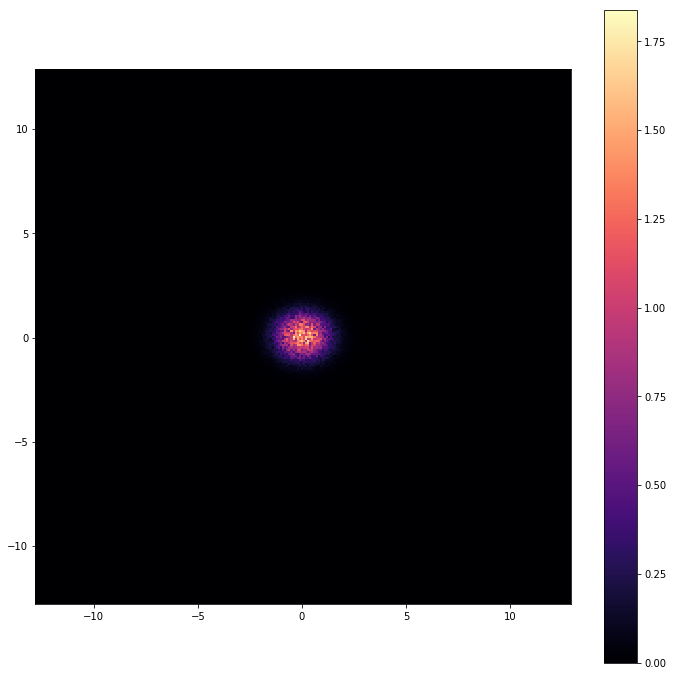

In [5]:
plotState(abs(Psi_gpu.get()))

whos

In [6]:
%whos GPUArray

Variable    Type        Data/Info
---------------------------------
Psi_gpu     GPUArray    [[ 0.+0.j  0.+0.j  0.+0.j<...> 0.+0.j  0.+0.j  0.+0.j]]
Psi_gpu_k   GPUArray    [[ 0.+0.j  0.+0.j  0.+0.j<...> 0.+0.j  0.+0.j  0.+0.j]]


In [7]:
%%time
for i in range(10000):
    implicitRelaxStep()
    

CPU times: user 12.7 s, sys: 9.48 s, total: 22.2 s
Wall time: 22.5 s


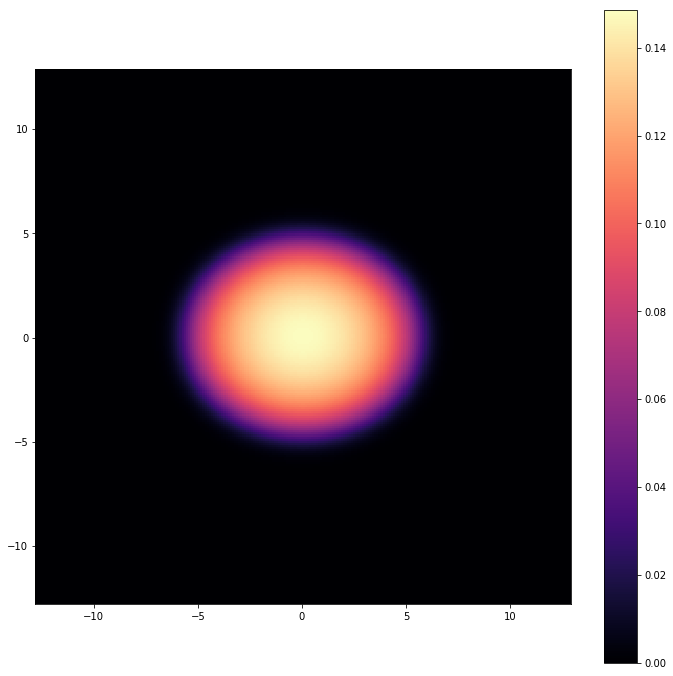

In [8]:
plotState(abs(Psi_gpu.get()))

In [9]:
%%time
for i in range(10000):
    splitStrangRelaxStep()

CPU times: user 7.56 s, sys: 3.73 s, total: 11.3 s
Wall time: 11.2 s


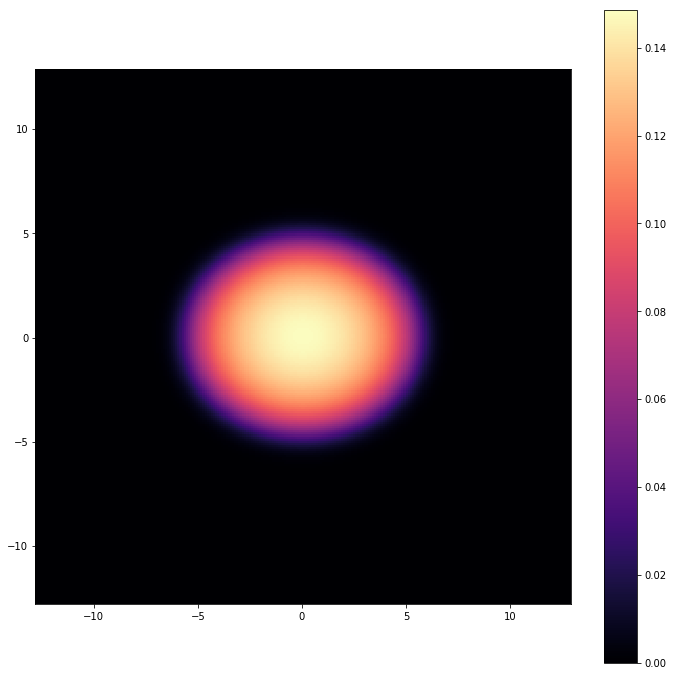

In [10]:
plotState(abs(Psi_gpu.get()))

# Spectral + RK4 (Global Memory)

$$f(x,y) =-i[ -\frac{1}{2}\nabla^2 \Psi (x,y,t)+\frac{1}{2}(\gamma_x^2 x^2+\gamma_y^2 y^2)\Psi(x,y,t)+ g_{2D}|\Psi(x,y,t)|^2\Psi(x,y,t)]$$
>Recurrence: $$y_{i+1} = y_i + \frac{1}{6}\delta t(k_1+2k_2+2k_3+k_4) \\$$
$$k_1 = f(t_i,y_i) \\
  k_2 = f(t_i+\frac{1}{2}\delta t, y_i+\frac{1}{2} k_1 \delta t) \\
  k_3 = f(t_i+\frac{1}{2}\delta t, y_i+\frac{1}{2} k_2 \delta t)\\
  k_4 = f(t_i+\delta t, y_i + k_3 \delta t)$$


In [12]:
Psi_gpu_k2 = gpuarray.zeros([Nx,Ny], dtype=precComplex) # aux2
Psi_gpu_new = gpuarray.zeros([Nx,Ny], dtype=precComplex)

In [13]:
copy_C(Psi_gpu,Psi_gpu_new)
copy_C(Psi_gpu,Psi_gpu_k) # aux

At beginning we should have 4 arrays $\psi_{aux}=\psi_{old}$ = $\psi_{new}$, $\psi_{aux2}$

 > 1) Calculate $\nabla_{i,j}^2\psi_{aux}$ store in an auxiliar $\psi_{aux2}$
 
 > 2) Evaluate $f(t_i,\psi_{aux})$ to get $k_1$ -> sum contribution to $\psi_{new}+=\frac{\delta t}{6}k_1$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+\frac{1}{2}k_1\delta t$ for next laplacian evaluation
 
 > 3) Calculate $\nabla_{i,j}^2\psi_{aux}$ and store in an auxiliar $\psi_{aux2}$
 
 > 4) Evaluate $f(t_i+\frac{1}{2}\delta t,\psi_{aux})$  to get $k_2$ an -> sum contribution to $\psi_{new}+=\frac{2\delta t}{6}k_2$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+\frac{1}{2}k_2\delta t$ for next laplacian evaluation
 
 > 5) Calculate $\nabla_{i,j}^2\psi_{aux}$ and store in an auxiliar $\psi_{aux2}$
 
  > 6) Evaluate $f(t_i+\frac{1}{2}\delta t,\psi_{aux})$  to get $k_3$  -> sum contribution to $\psi_{new}+=\frac{2\delta t}{6}k_3$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+k_3\delta t$ for next laplacian evaluation
  
  > 7) Calculate $\nabla_{i,j}^2\psi_{aux}$ and store in an auxiliar $\psi_{aux2}$
  
  > 8) Evaluate $f(t_i+\delta t,\psi_{aux})$  to get $k_4$  -> sum contribution to $\psi_{new}+=\frac{\delta t}{6}k_4$ and overwrite $\psi_{old}=\psi_{new}$ and $\psi_{aux}=\psi_{new}$

Then interate from 1) -> 8): Because im  lazy we just use 1 kernels, a common  one $$f_{common}(\psi_{old},\psi_{new},k_i,\nabla_{i,j}^2(\psi_{old}+\alpha k_i))$$ 

Onces we undertand the flow of coding in PyCUDA, A good idea is keep distinct sources of the code in separate source files, python with python, cuda with cuda and so on ... developing in Jupyter has some advantages like this:
### [CUDA Kernels Dynamics](http://localhost:8888/edit/kernelsDynamic.cu)

In [14]:
myfile = open('kernelsDynamic.cu')
myKern = myfile.read()
myfile.close()

In [15]:
#print myKern

In [16]:
fftRK4K = compileGPU(myKern)

In [17]:
getNablaPSI = fftRK4K.get_function('applyNablaSquare')
stepRk4 = fftRK4K.get_function('rk4StepCommon')
getEnergyGPU = fftRK4K.get_function('energy_kernel')

In [18]:
#int nPointX, int nPointY,cudaPres Lx, cudaPres Ly, pycuda::complex<cudaPres> *fftpsi
getNablaPSI.prepare('ii'+2*cString+'P') 
#cudaPres at, cudaPres ak, cudaPres apsi, 
#cudaPres time, cudaPres dt,
#cudaPres xMin, cudaPres yMin, 
#cudaPres dx, cudaPres dy, 
#cudaPres gammaX, cudaPres gammaY,
#cudaPres constG, 
#pycuda::complex<cudaPres> *psi_old,
#pycuda::complex<cudaPres> *psi_new,
#pycuda::complex<cudaPres> *kaux, 
#pycuda::complex<cudaPres> *kaux2
stepRk4.prepare(cString*12+'PPPP')
#cudaPres xMin, cudaPres yMin, 
#cudaPres dx, cudaPres dy,
#cudaPres gammaX, cudaPres gammaY,
#cudaPres dt, cudaPres constG,
#pycuda::complex<cudaPres> *psi_state,
#pycuda::complex<cudaPres> *V2psi,
#pycuda::complex<cudaPres> *ki
getEnergyGPU.prepare(cString*8+'PP')

1) Calculate $\nabla_{i,j}^2\psi_{aux}$ store in an auxiliar $\psi_{aux2}$

In [19]:
gpuFFT.execute(Psi_gpu_k,Psi_gpu_k2)
getNablaPSI.prepared_call(gridDims, blockDims,
                          Nx,Ny,Lx,Ly,Psi_gpu_k2.gpudata)
gpuFFT.execute(Psi_gpu_k2, inverse=True)

2) Evaluate $f(t_i,\psi_{aux})$ to get $k_1$ -> sum contribution to $\psi_{new}+=\frac{\delta t}{6}k_1$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+\frac{1}{2}k_1\delta t$ for next laplacian evaluation

In [20]:
t=0
stepRk4.prepared_call(gridDims, blockDims,
                      prec(0), prec(0.5), prec(1/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata, Psi_gpu_k2.gpudata)
                       

3) Calculate $\nabla_{i,j}^2\psi_{aux}$ store in an auxiliar $\psi_{aux2}$

In [21]:
gpuFFT.execute(Psi_gpu_k,Psi_gpu_k2)
getNablaPSI.prepared_call(gridDims, blockDims,
                          Nx,Ny,Lx,Ly,Psi_gpu_k2.gpudata)
gpuFFT.execute(Psi_gpu_k2, inverse=True)

4) Evaluate $f(t_i+\frac{1}{2}\delta t,\psi_{aux})$  to get $k_2$ an -> sum contribution to $\psi_{new}+=\frac{2\delta t}{6}k_2$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+\frac{1}{2}k_2\delta t$ for next laplacian evaluation
 

In [22]:
stepRk4.prepared_call(gridDims, blockDims,
                      prec(0.5), prec(0.5), prec(2/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata, Psi_gpu_k2.gpudata)

5) Calculate $\nabla_{i,j}^2\psi_{aux}$ store in an auxiliar $\psi_{aux2}$

In [23]:
gpuFFT.execute(Psi_gpu_k,Psi_gpu_k2)
getNablaPSI.prepared_call(gridDims, blockDims,
                          Nx,Ny,Lx,Ly,Psi_gpu_k2.gpudata)
gpuFFT.execute(Psi_gpu_k2, inverse=True)

6) Evaluate $f(t_i+\frac{1}{2}\delta t,\psi_{aux})$  to get $k_3$  -> sum contribution to $\psi_{new}+=\frac{2\delta t}{6}k_3$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+k_3\delta t$ for next laplacian evaluation

In [24]:
stepRk4.prepared_call(gridDims, blockDims,
                      prec(0.5), prec(1), prec(2/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata, Psi_gpu_k2.gpudata)

7) Calculate $\nabla_{i,j}^2\psi_{aux}$ store in an auxiliar $\psi_{aux2}$

In [25]:
gpuFFT.execute(Psi_gpu_k,Psi_gpu_k2)
getNablaPSI.prepared_call(gridDims, blockDims,
                          Nx,Ny,Lx,Ly,Psi_gpu_k2.gpudata)
gpuFFT.execute(Psi_gpu_k2, inverse=True)

8) Evaluate $f(t_i+\delta t,\psi_{aux})$  to get $k_4$  -> sum contribution to $\psi_{new}+=\frac{\delta t}{6}k_4$ and overwrite $\psi_{old}=\psi_{new}$ and $\psi_{aux}=\psi_{new}$

In [26]:
stepRk4.prepared_call(gridDims, blockDims,
                      prec(1), prec(0), prec(1/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata, Psi_gpu_k2.gpudata)

In [27]:
copy_C(Psi_gpu_new,Psi_gpu)
copy_C(Psi_gpu_new,Psi_gpu_k)

In [28]:
t += dtau

In [29]:
def fftRk4Step():
    global t
    gpuFFT.execute(Psi_gpu_k,Psi_gpu_k2)
    getNablaPSI.prepared_call(gridDims, blockDims,
                          Nx,Ny,Lx,Ly,Psi_gpu_k2.gpudata)
    gpuFFT.execute(Psi_gpu_k2, inverse=True)
    stepRk4.prepared_call(gridDims, blockDims,
                      prec(0), prec(0.5), prec(1/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata, Psi_gpu_k2.gpudata)
    
    gpuFFT.execute(Psi_gpu_k,Psi_gpu_k2)
    getNablaPSI.prepared_call(gridDims, blockDims,
                          Nx,Ny,Lx,Ly,Psi_gpu_k2.gpudata)
    gpuFFT.execute(Psi_gpu_k2, inverse=True)
    stepRk4.prepared_call(gridDims, blockDims,
                      prec(0.5), prec(0.5), prec(2/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata, Psi_gpu_k2.gpudata)
    
    gpuFFT.execute(Psi_gpu_k,Psi_gpu_k2)
    getNablaPSI.prepared_call(gridDims, blockDims,
                          Nx,Ny,Lx,Ly,Psi_gpu_k2.gpudata)
    gpuFFT.execute(Psi_gpu_k2, inverse=True)
    stepRk4.prepared_call(gridDims, blockDims,
                      prec(0.5), prec(1), prec(2/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata, Psi_gpu_k2.gpudata)
    
    gpuFFT.execute(Psi_gpu_k,Psi_gpu_k2)
    getNablaPSI.prepared_call(gridDims, blockDims,
                          Nx,Ny,Lx,Ly,Psi_gpu_k2.gpudata)
    gpuFFT.execute(Psi_gpu_k2, inverse=True)
    stepRk4.prepared_call(gridDims, blockDims,
                      prec(1), prec(0), prec(1/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata, Psi_gpu_k2.gpudata)
    copy_C(Psi_gpu_new,Psi_gpu)
    copy_C(Psi_gpu_new,Psi_gpu_k)
    t += dtau

In [30]:
def getEnergyState():
    gpuFFT.execute(Psi_gpu,Psi_gpu_k2)
    getNablaPSI.prepared_call(gridDims, blockDims,
                          Nx,Ny,Lx,Ly,Psi_gpu_k2.gpudata)
    gpuFFT.execute(Psi_gpu_k2, inverse=True)
    getEnergyGPU.prepared_call(gridDims, blockDims,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY,
                       dtau, g,
                       Psi_gpu.gpudata, Psi_gpu_k2.gpudata)
    energy = get_integral_C(dx,dy,Psi_gpu_k2).get()
    return energy

In [31]:
getEnergyState()

array((8.286437034606934+3.10592440655455e-09j), dtype=complex64)

In [32]:
get_Norm_C(dx,dy,Psi_gpu).get()

array(1.0000001192092896, dtype=float32)

In [33]:
%%time
e = []
norma = []
time = []
for i in range(100):
    for j in range(100): fftRk4Step()
    e.append(getEnergyState())
    time.append(dtau*100*(i+1))
    norma.append(get_Norm_C(dx,dy,Psi_gpu).get())

CPU times: user 15.5 s, sys: 2.17 s, total: 17.7 s
Wall time: 17.7 s


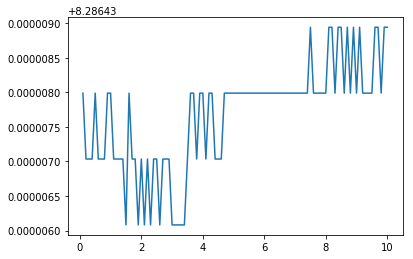

In [34]:
plot(time,array(e).real)
#plot(time,array(e).imag)

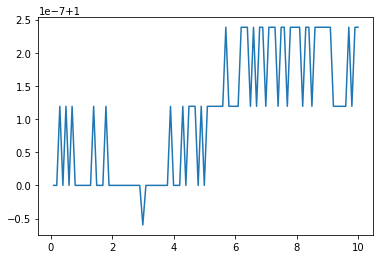

In [35]:
plot(time,array(norma).real)
#plot(time,array(norma).imag)
#ylim(0.999999,1.000001)

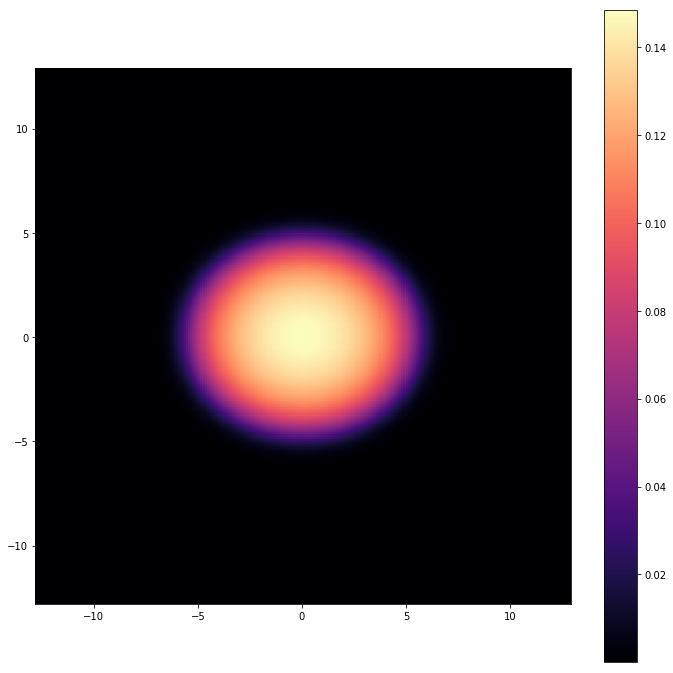

In [36]:
plotState(abs(Psi_gpu.get()))

In [37]:
t

10.001000475022011

In [38]:
getEnergyState()

array((8.286438941955566-2.2137101041153073e-09j), dtype=complex64)

In [39]:
DeltaE = max(array(e).real)     - min(array(e).real)
DeltaN = max(array(norma).real) - min(array(norma).real)

In [40]:
DeltaE, DeltaN

(2.8610229e-06, 2.9802322e-07)

### **QUIZ: Implement dynamical evolution with Split-Operator**
Idea! 

Luis -> implements first order

Siddhartha -> 2dn order

Alexis -> 4th order

> - **Orden lieneal** $p=1$ (Lie-Trotter)
$$ \Psi(\delta t)=e^{\delta t \mathcal{L}}e^{\delta t\mathcal{N}}\Psi_0 $$ o $$ \Psi(\delta t)=e^{\delta t\mathcal{N}}e^{\delta t \mathcal{L}}\Psi_0 $$ y $\Psi_0 = \Psi(t_0)$ la condicion inicial

> - **Segundo orden** $p=2$ (Strang)
$$ \Psi(\delta t)=e^{\delta t \mathcal{L}/2}e^{\delta t\mathcal{N}}e^{\delta t \mathcal{L}/2}\Psi_0 \equiv \hat{U}(\delta t)_{p=2}\Psi_0$$ o $$ \Psi(\delta t)=e^{\delta t \mathcal{N}/2}e^{\delta t\mathcal{L}}e^{\delta t \mathcal{N}/2}\Psi_0 $$ 

> - **Cuarto orden** $p=4$ 
$$ \Psi(\delta t)=\hat{U}(\omega\delta t)_{p=2}\hat{U}((1-2\omega)\delta t)_{p=2}\hat{U}(\omega\delta t)_{p=2}\Psi_0 \\ = e^{\omega\delta t \mathcal{N}/2}e^{\omega\delta t\mathcal{L}}\, e^{(1-\omega)\delta t \mathcal{N}/2}e^{(1-2\omega)\delta t\mathcal{L}}e^{(1-\omega)\delta t \mathcal{N}/2} \, e^{\omega\delta t\mathcal{L}}e^{\omega\delta t \mathcal{N}/2}  \\ = e^{\omega\delta t \mathcal{L}/2}e^{\omega\delta t\mathcal{N}}\, e^{(1-\omega)\delta t \mathcal{L}/2}e^{(1-2\omega)\delta t\mathcal{N}}e^{(1-\omega)\delta t \mathcal{L}/2} \, e^{\omega\delta t\mathcal{N}}e^{\omega\delta t \mathcal{L}/2},$$ $\omega = \frac{2+2^{1/3}+2^{-1/3}}{3}$